### Import the usual suspects:

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Read an image from disk and display it:

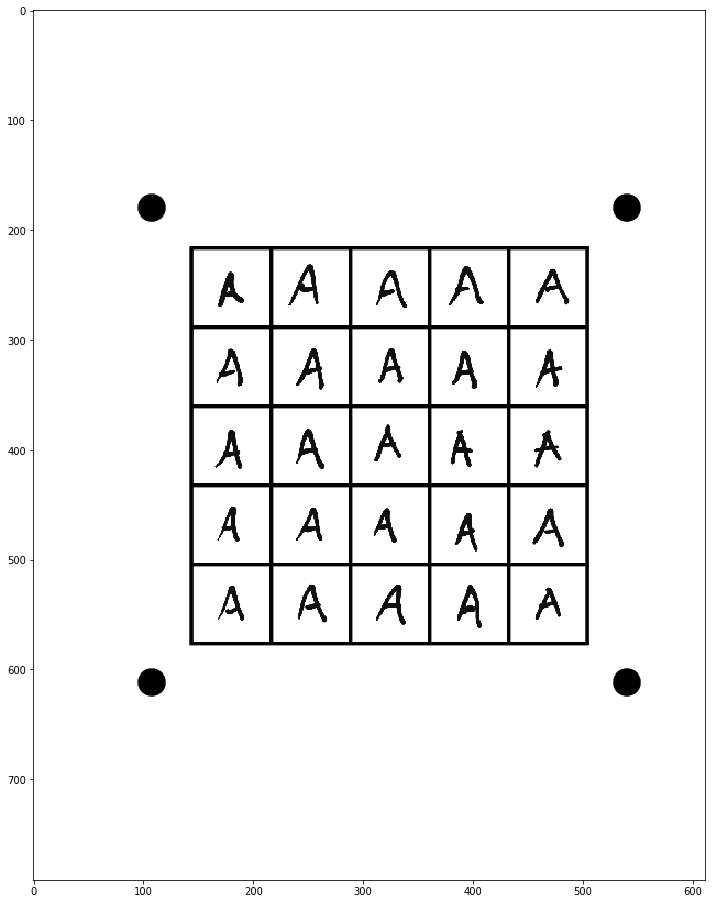

In [2]:
IMAGE='/home/jaeger/dev/python/emnist/TDS/a.png'

orig_img = cv2.imread(IMAGE, cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(16, 16))
plt.imshow(orig_img, cmap='gray')
plt.show()

### Create and configure the blob detector to find corner dots:

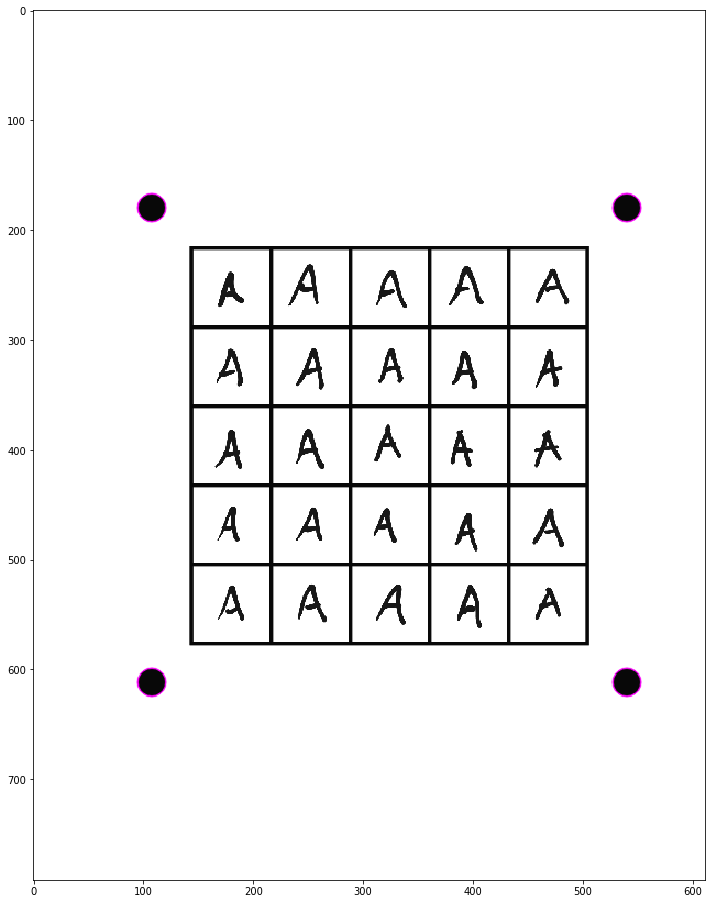

In [8]:
params = cv2.SimpleBlobDetector_Params()

# filter by filled pixel area
params.filterByArea = True
params.minArea = 250

# filter by circularity
params.filterByCircularity = True
params.minCircularity = 0.9

# deal with cv2 version differences
is_v2 = cv2.__version__.startswith('2.')
if is_v2:
    detector = cv2.SimpleBlobDetector(params)
else:
    detector = cv2.SimpleBlobDetector_create(params)

# find dots and save their locations as keypoints
keypoints = detector.detect(orig_img)

# draw the found keypoints on the image
img_kp = cv2.drawKeypoints(orig_img, keypoints, np.array([]), (255, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig = plt.figure(figsize=(16, 16))
plt.imshow(img_kp)
plt.show()

In [9]:
inpts = np.float32([[kp.pt[0], kp.pt[1]] for kp in keypoints])
print(inpts)
outpts = np.float32([[600, 600], [0, 600], [600, 0], [0, 0]])
print(outpts)

[[539.5     611.52936]
 [107.5     611.52936]
 [539.5     179.52939]
 [107.5     179.52939]]
[[600. 600.]
 [  0. 600.]
 [600.   0.]
 [  0.   0.]]


### Warp the image to square on the found keypoints:

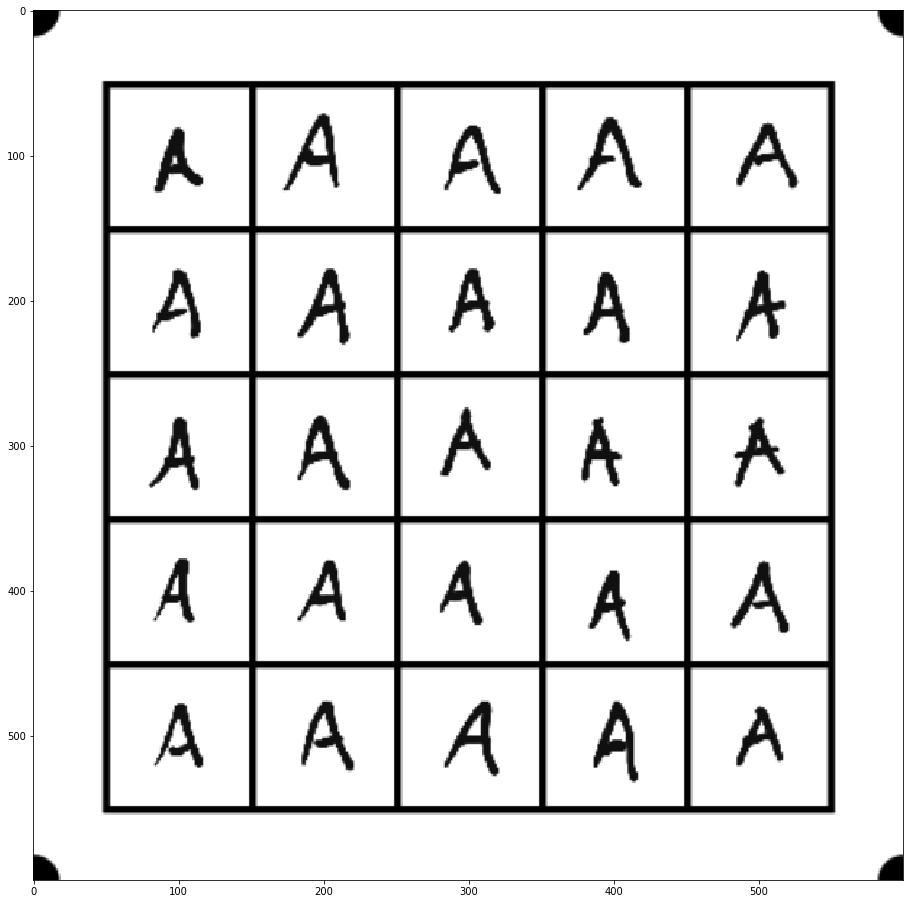

In [12]:
M = cv2.getPerspectiveTransform(inpts, outpts)
img_warp = cv2.warpPerspective(orig_img, M, (600, 600))

#img_warp = 255 - img_warp

fig = plt.figure(figsize=(16, 16))
plt.imshow(img_warp, cmap='gray')
plt.show()

### Split the grid into 25 (5x5) separate images:

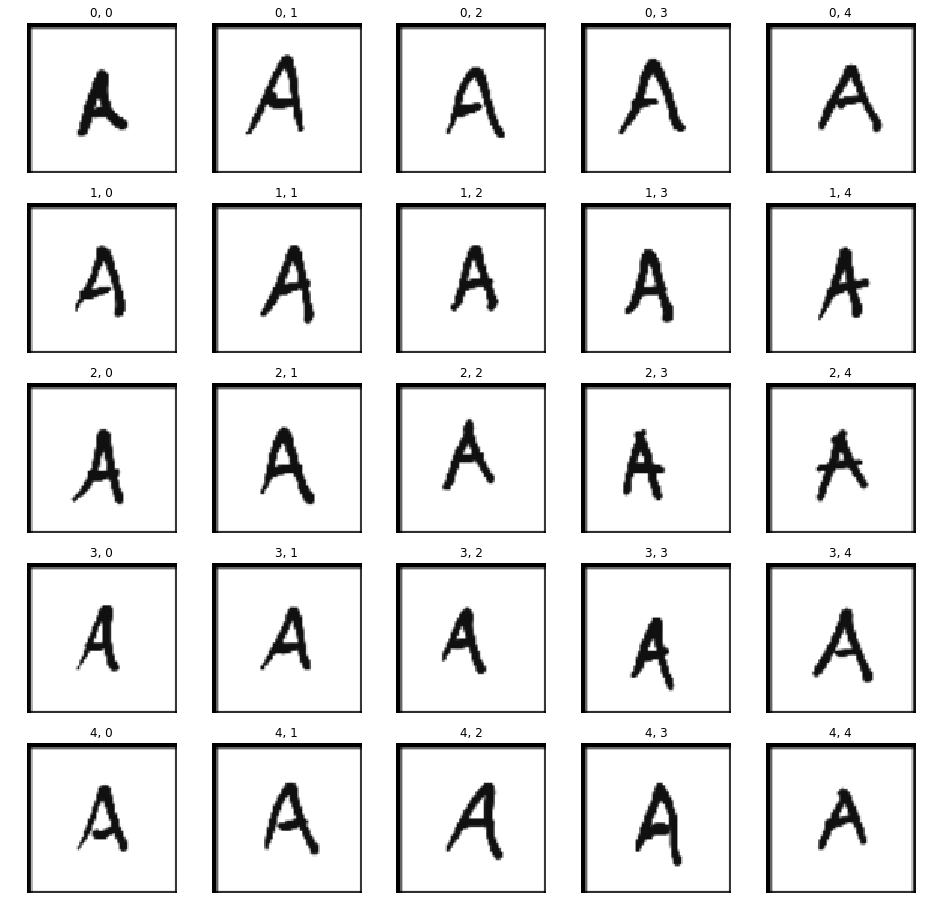

In [13]:
fig = plt.figure(figsize=(16, 16))

axes = []

cellsize = int((img_warp.shape[0]-100) / 5)
for row in range(0, 5):
    for col in range(0, 5):
        axes.append(plt.subplot2grid((5, 5), (row, col)))

cur = 0
onrow = 0
oncol = 0
for ax in axes:
    ax.axis('off')
    ax.set_title("%d, %d" % (onrow, oncol))
    ax.imshow(img_warp[50+cellsize*onrow:50+cellsize*onrow+cellsize,50+cellsize*oncol:50+cellsize*oncol+cellsize], cmap='gray')
    cur += 1
    if cur % 5 == 0:
        onrow += 1
    oncol = cur % 5

plt.show()